In [83]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [84]:
# #############
#   load data
# #############
df = pd.read_csv("..\\data\\02_cleanData_properties_data.csv", index_col="ID")
df.shape

(18348, 39)

In [85]:
data_by_type = df.groupby("type")["subtype"].count()
print(data_by_type)

type
APARTMENT    9079
HOUSE        9269
Name: subtype, dtype: int64


region
Brussels     2526
Flanders    11148
Wallonie     4674
Name: type, dtype: int64

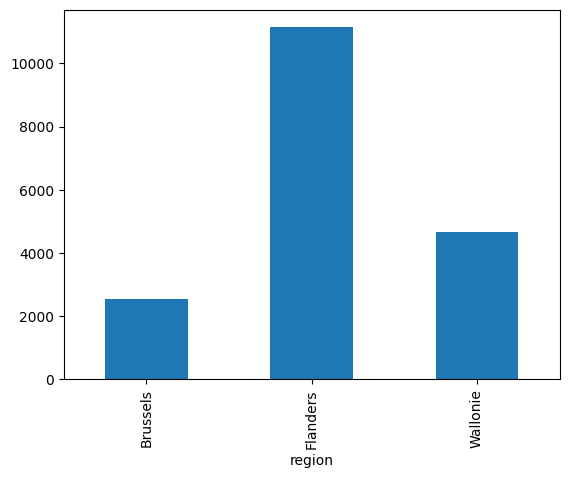

In [86]:
data_by_region = df.groupby(["region"])["type"].count()
display(data_by_region)
data_by_region.plot(kind="bar")
plt.show()

region    province       
Brussels  Brussels           2526
Flanders  Antwerp            3143
          East Flanders      2640
          Flemish Brabant    1394
          Limburg             750
          West Flanders      3221
Wallonie  Hainaut            1553
          Liège              1273
          Luxembourg          415
          Namur               670
          Walloon Brabant     763
Name: type, dtype: int64

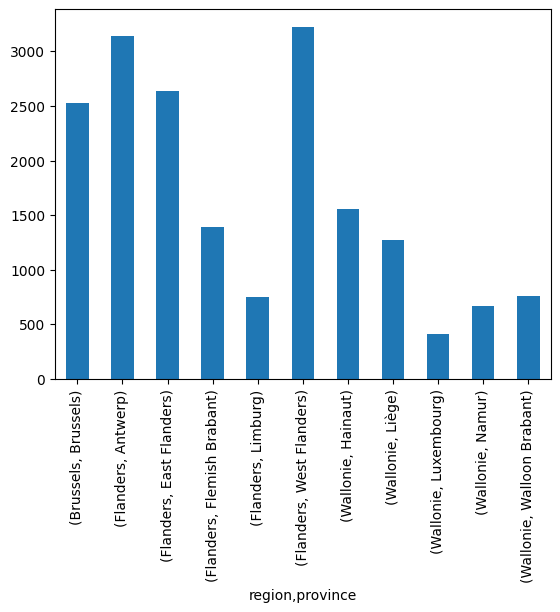

In [87]:
data_by_region_province = df.groupby(["region", "province"])["type"].count()
display(data_by_region_province)
data_by_region_province.plot(kind="bar")
plt.show()

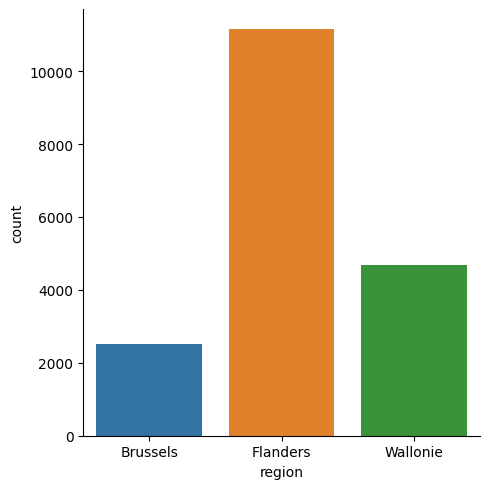

In [88]:
###
#sns.set_palette(["black", "yellow", "red"])
regions = ["Brussels", "Flanders", "Wallonie"]
sns.catplot(x="region", order=regions, data=df, kind="count")
plt.show()

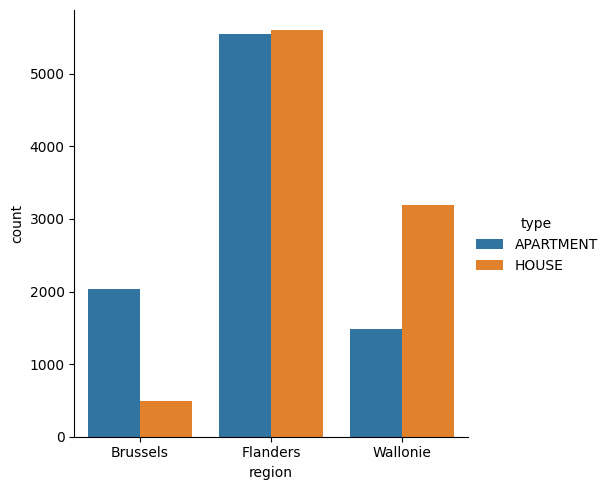

In [89]:
regions = ["Brussels", "Flanders", "Wallonie"]
sns.catplot(x="region", order=regions, hue="type", data=df, kind="count")
plt.show()

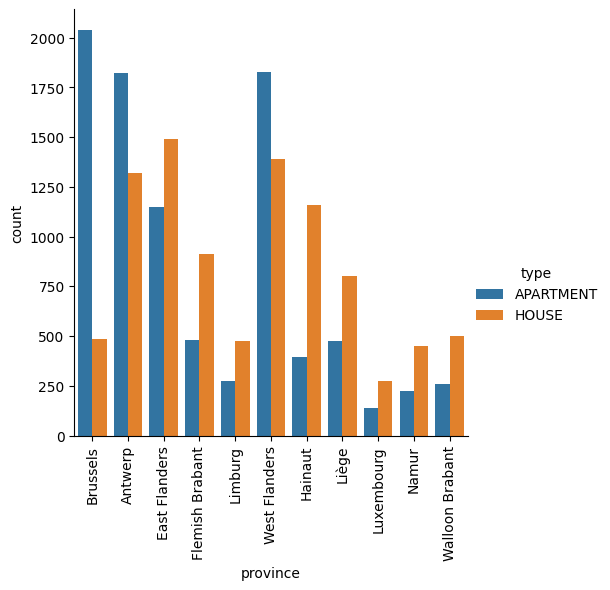

In [90]:
provinces = ['Brussels', 'Antwerp', 'East Flanders', 'Flemish Brabant', 'Limburg', 'West Flanders', 
             'Hainaut', 'Liège', 'Luxembourg', 'Namur', 'Walloon Brabant']
sns.catplot(x="province", hue="type", order=provinces, data=df, kind="count")
plt.xticks(rotation=90)
plt.show()

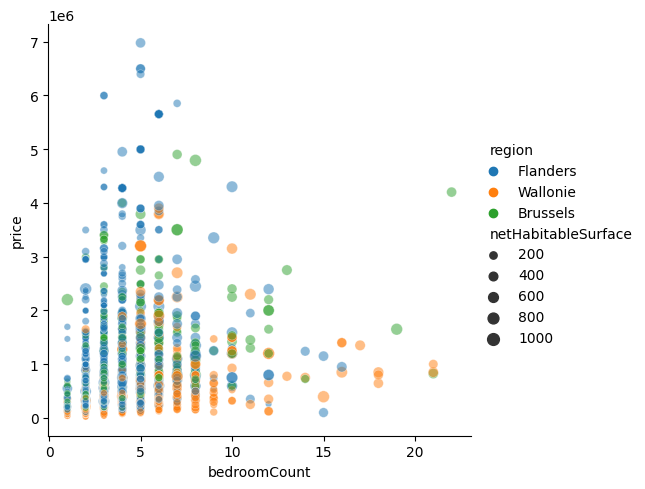

In [91]:
subset = ["type", "price", "pricePerMeter", "bedroomCount", "netHabitableSurface", "region", "province"]
data = df[subset].dropna()
sns.relplot(
    x="bedroomCount", y="price", hue="region", 
    size="netHabitableSurface", alpha=0.5, data=data, kind="scatter"
    )
plt.show()

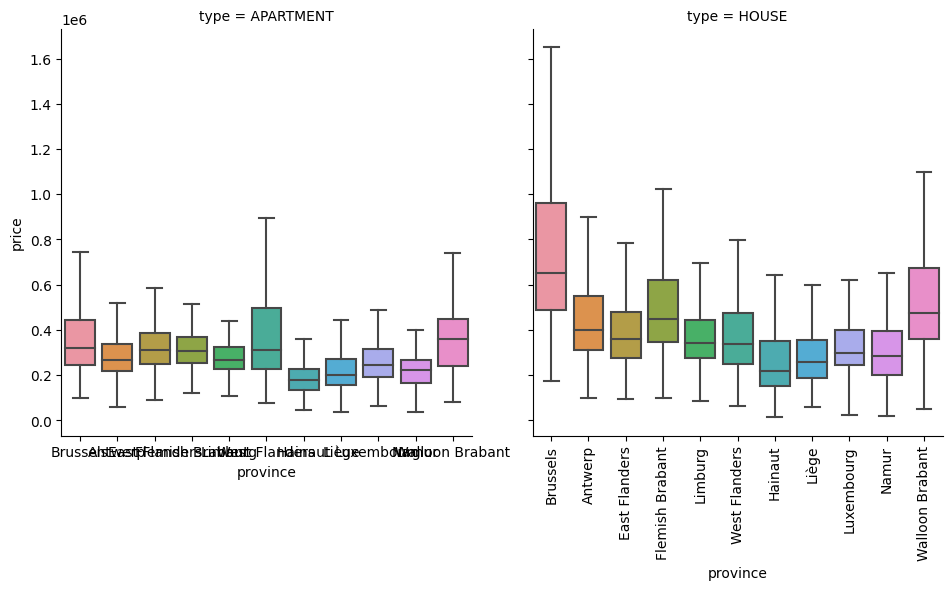

In [92]:
subset = ["type", "price", "region", "province"]
data = df[subset].dropna()
sns.catplot(x="province", y="price", order=provinces, col="type", data=data, kind="box", sym="")
plt.xticks(rotation=90)
plt.show()

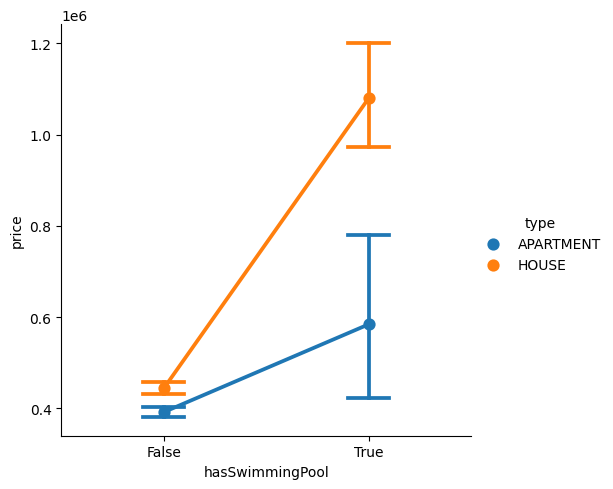

In [93]:
subset = ["type", "price", "hasSwimmingPool"]
data = df[subset].dropna()
sns.catplot(x="hasSwimmingPool", y="price", hue="type", capsize=0.2, data=data, kind="point")
plt.show()

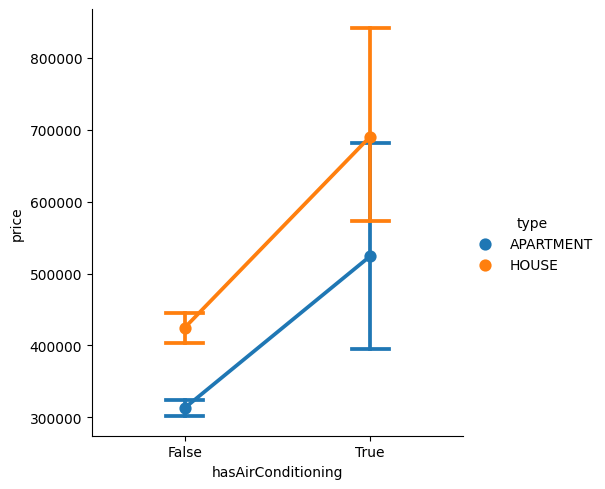

In [94]:
# hasAirConditioning
subset = ["type", "price", "hasAirConditioning"]
data = df[subset].dropna()
sns.catplot(x="hasAirConditioning", y="price", hue="type", capsize=0.2, data=data, kind="point")
plt.show()

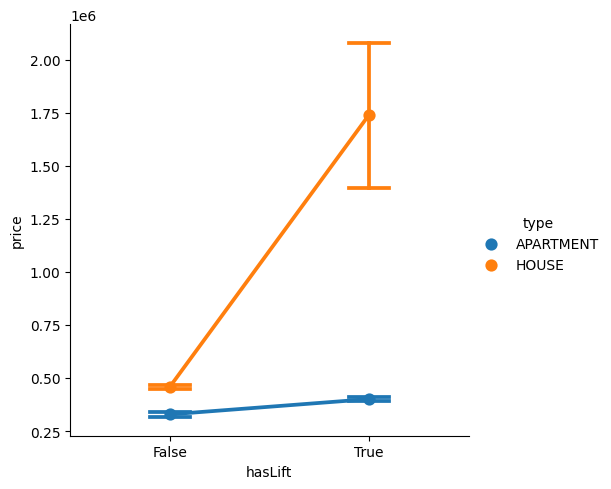

In [95]:
# hasLift
subset = ["type", "price", "hasLift"]
data = df[subset].dropna()
sns.catplot(x="hasLift", y="price", hue="type", capsize=0.2, data=data, kind="point")
plt.show()

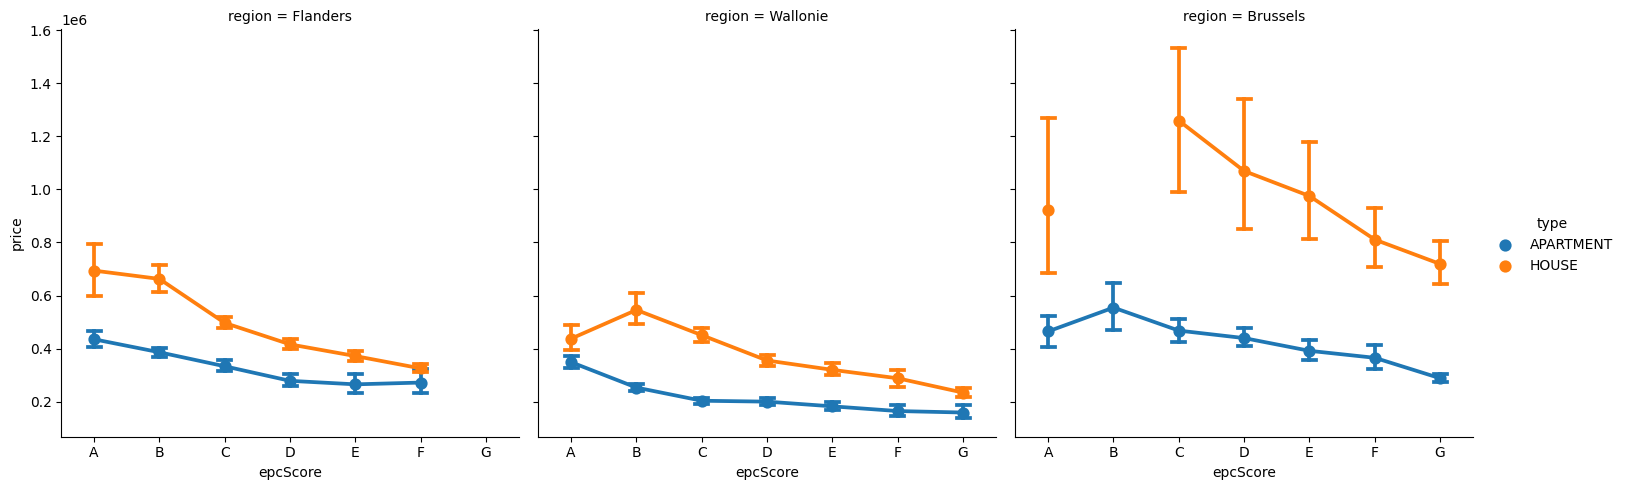

In [97]:
subset = ["type", "price", "epcScore", "region"]
data = df[subset].dropna()
epc = ["A", "B", "C", "D", "E", "F", "G"]
sns.catplot(x="epcScore", y="price", hue="type", col="region", capsize=0.2, order=epc, data=data, kind="point")
plt.show()

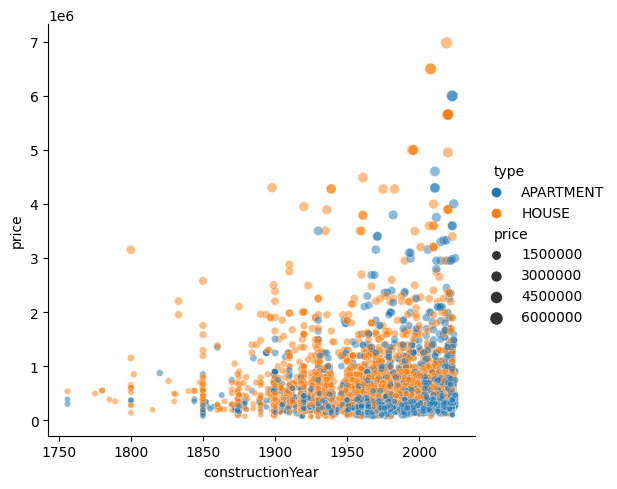

In [98]:
subset = ["type", "price", "constructionYear", "region"]
data = df[subset].dropna()
sns.relplot(x="constructionYear", y="price", hue="type", size="price", alpha=0.5, data=data, kind="scatter")
plt.show()